# A guide for the Fitter function

In [1]:
from visual_methods import *
from functions import *
%matplotlib notebook

## Importing and displaying data


<IPython.core.display.Javascript object>


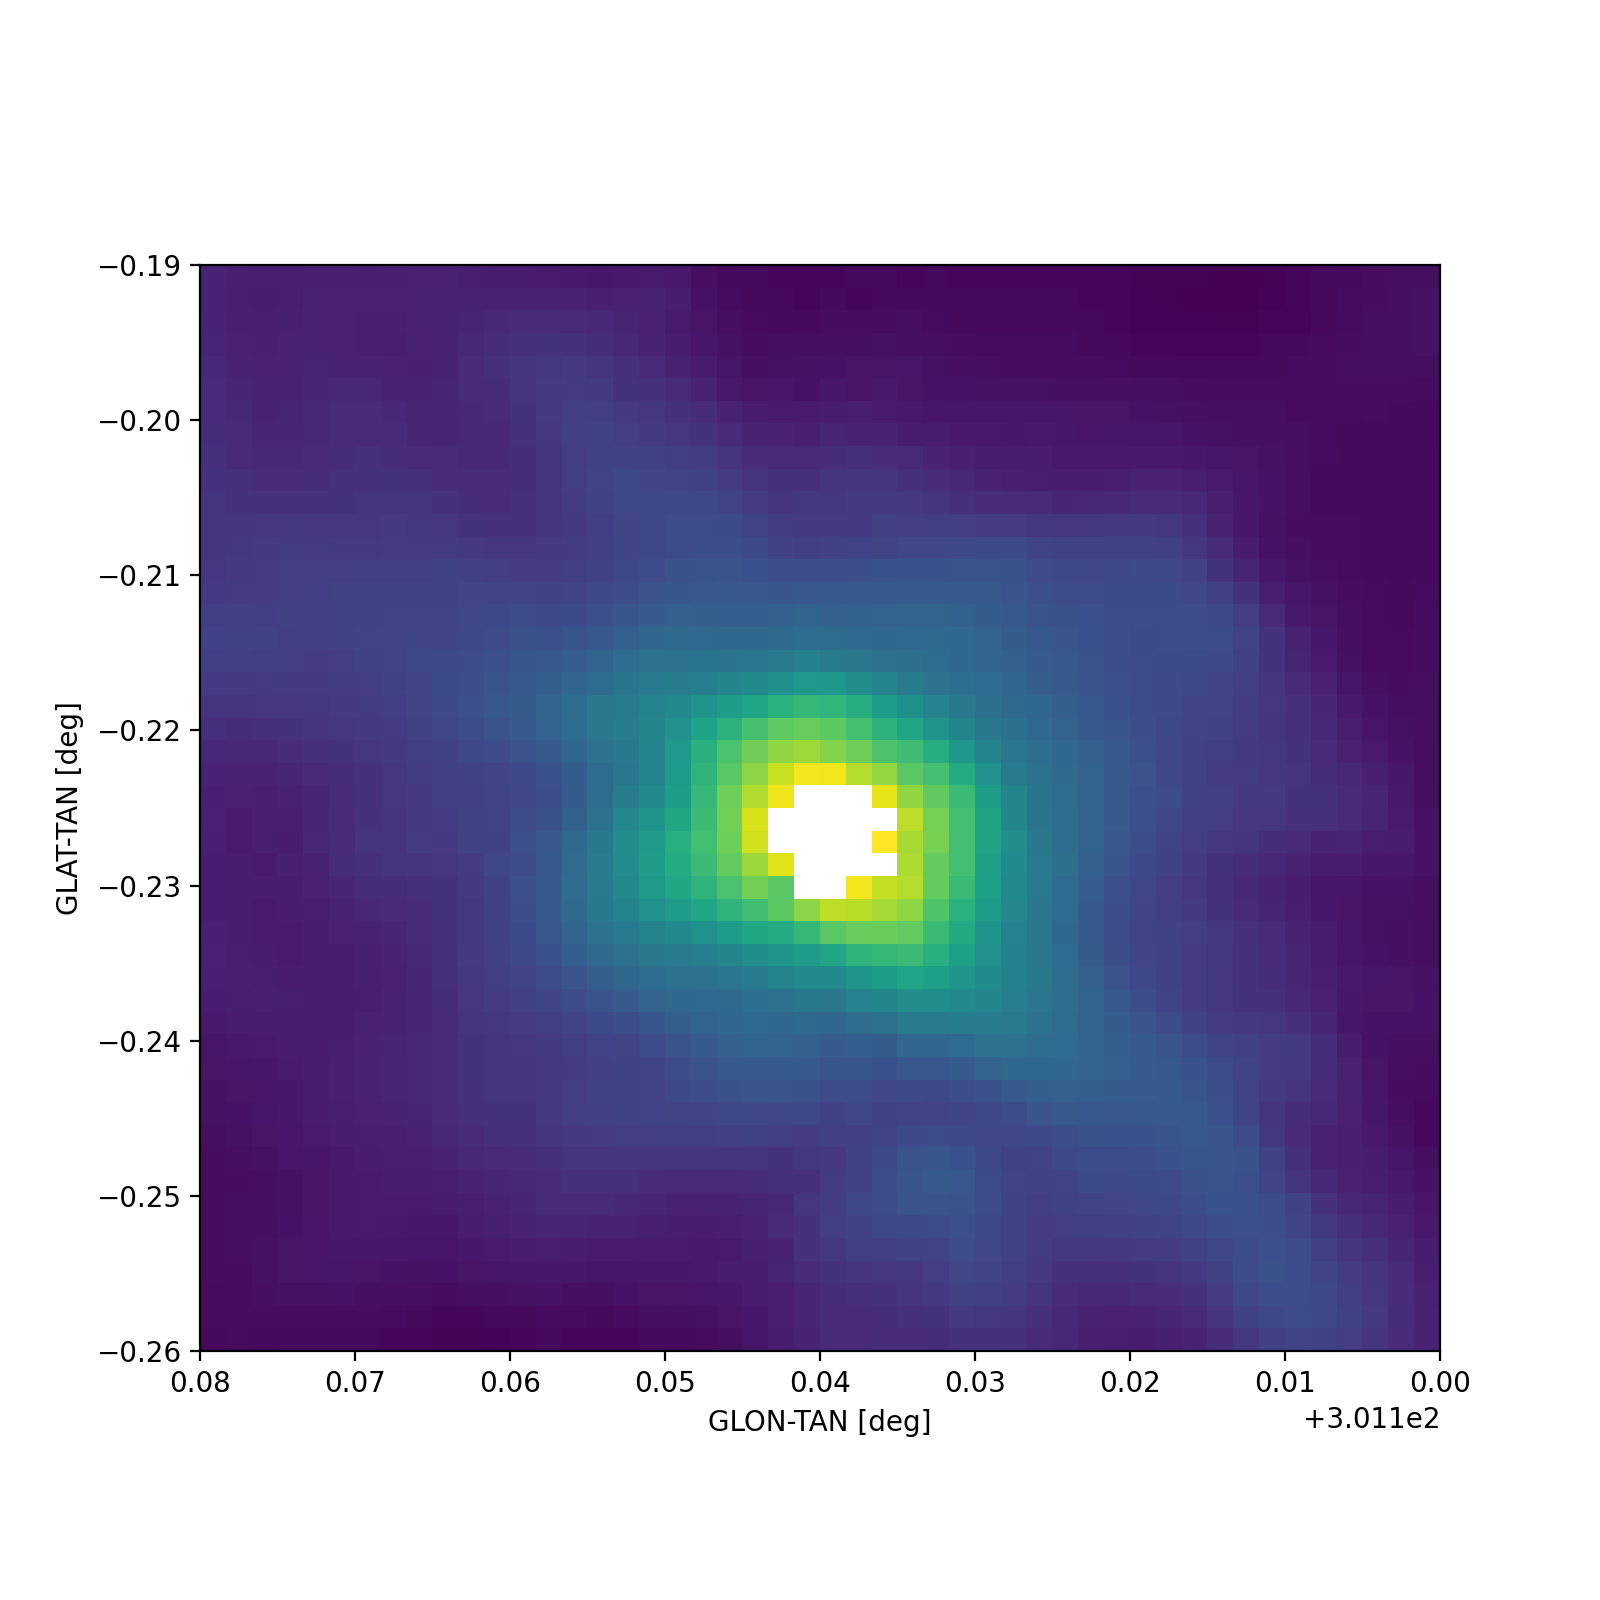

In [2]:
path = 'Data/'
file = 'example.fits'

xl,xr,yb,yt = 301.18,301.1,-0.26,-0.19

lims = [xl,xr,yb,yt]

data,grid = open_fits_image(path+file,lims=lims,show=True)

## Simple 1 gaussian Fit
To fix a saturated image, we may use the $\tt{fitter()}$ function.

In its simplest form, 3 arguments should be passed: $\tt{data}$ and $\tt{grid}$. These should be the same types of objects as those returned by $\tt{open_{-}fits_{-}image}$. In this case the function will assume it is fitting a single gaussian source in the center of the saturated region.

The function returns 2 objects:


1. a 2D array with the corrected image,

2. a 1D array type of object containing all the parameters of the gaussian fit,

3. the estimated background value.

<IPython.core.display.Javascript object>


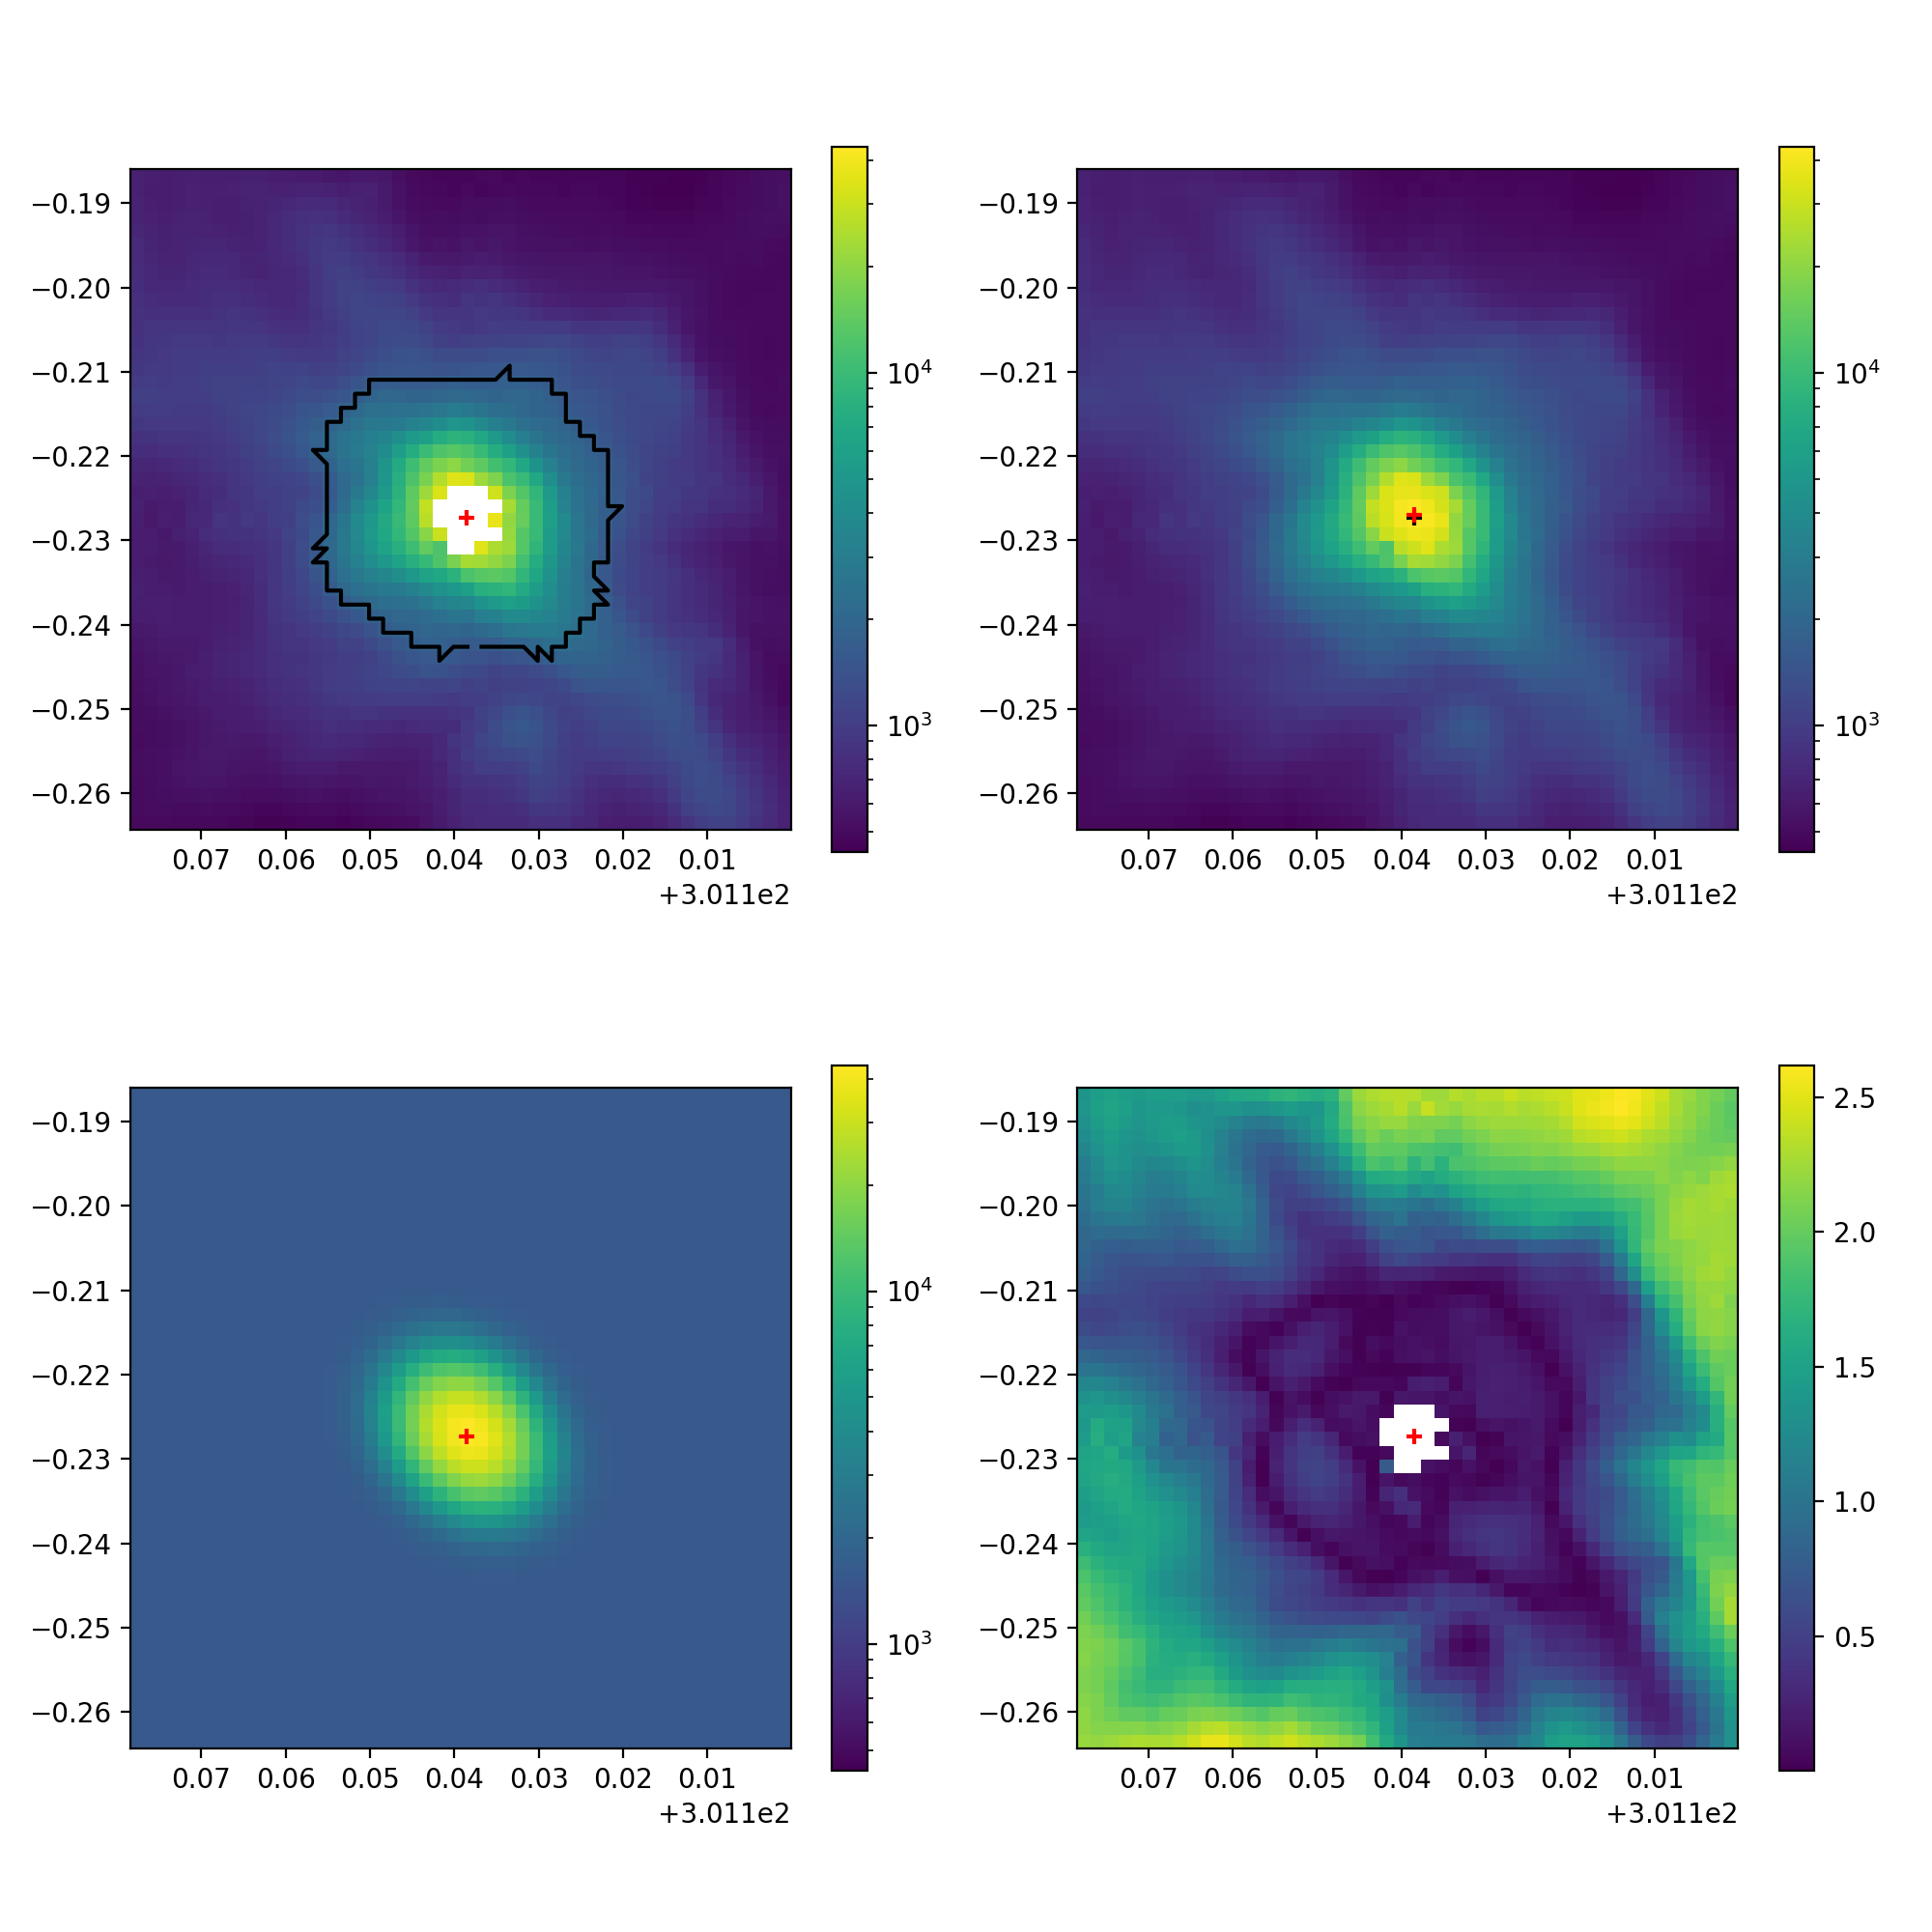

Position of the peak: (301.13843780077605, -0.22692519533998978)

Height of the peak: 42618.422261243744

Angle of the Ellipse: 0.7637359052791729

FWHM of axis': (0.009782011627216133, 0.012178497781790316)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [3]:
#Using arguments from previous cell
image,params,bg = fitter(data,grid) 

results_plot(data,grid,image,params,bg)

#Getting the parameters of the fit
mu_x,mu_y,N,theta,FWHM_x,FWHM_y = params
print("Position of the peak: ({i}, {j})\n".format(i = mu_x, j = mu_y))
print("Height of the peak: {i}\n".format(i = N))
print("Angle of the Ellipse: {i}\n".format(i = theta))
print("FWHM of axis': ({i}, {j})".format(i = FWHM_x, j = FWHM_y))
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

So far, we haven't given the programme any initial guesses for the shape and position of the gaussian surface we are trying to fit. In this case the fit was ok, but in many others this won't be enough and we should provide information, especially about the FWHM values.

The $\tt{fitter()}$ function can be used to fit multiple peaks within the same image, therefore, if we want to use the non-default option of giving the FWHM values, we have to supply 2 (amax,amin) values for each peak.

So the FWHM input is a numpy array with the shape of the following matrix:

$$FWHM = \begin{bmatrix} a_{max}^{(1)} & a_{min}^{(1)} \\ a_{max}^{(2)} & a_{min}^{(2)} \\ \vdots & \vdots \\ a_{max}^{(n)} & a_{min}^{(n)} \end{bmatrix}$$

where, $a_\mathrm{max}^{(i)}$ is the FWHM value for the $i$-th peak along the semi-major axis.

Note: if we try to fit $n$ peaks, that information should be included in the ${\tt peaks} = n$ argument, which has a default of 1.

<IPython.core.display.Javascript object>


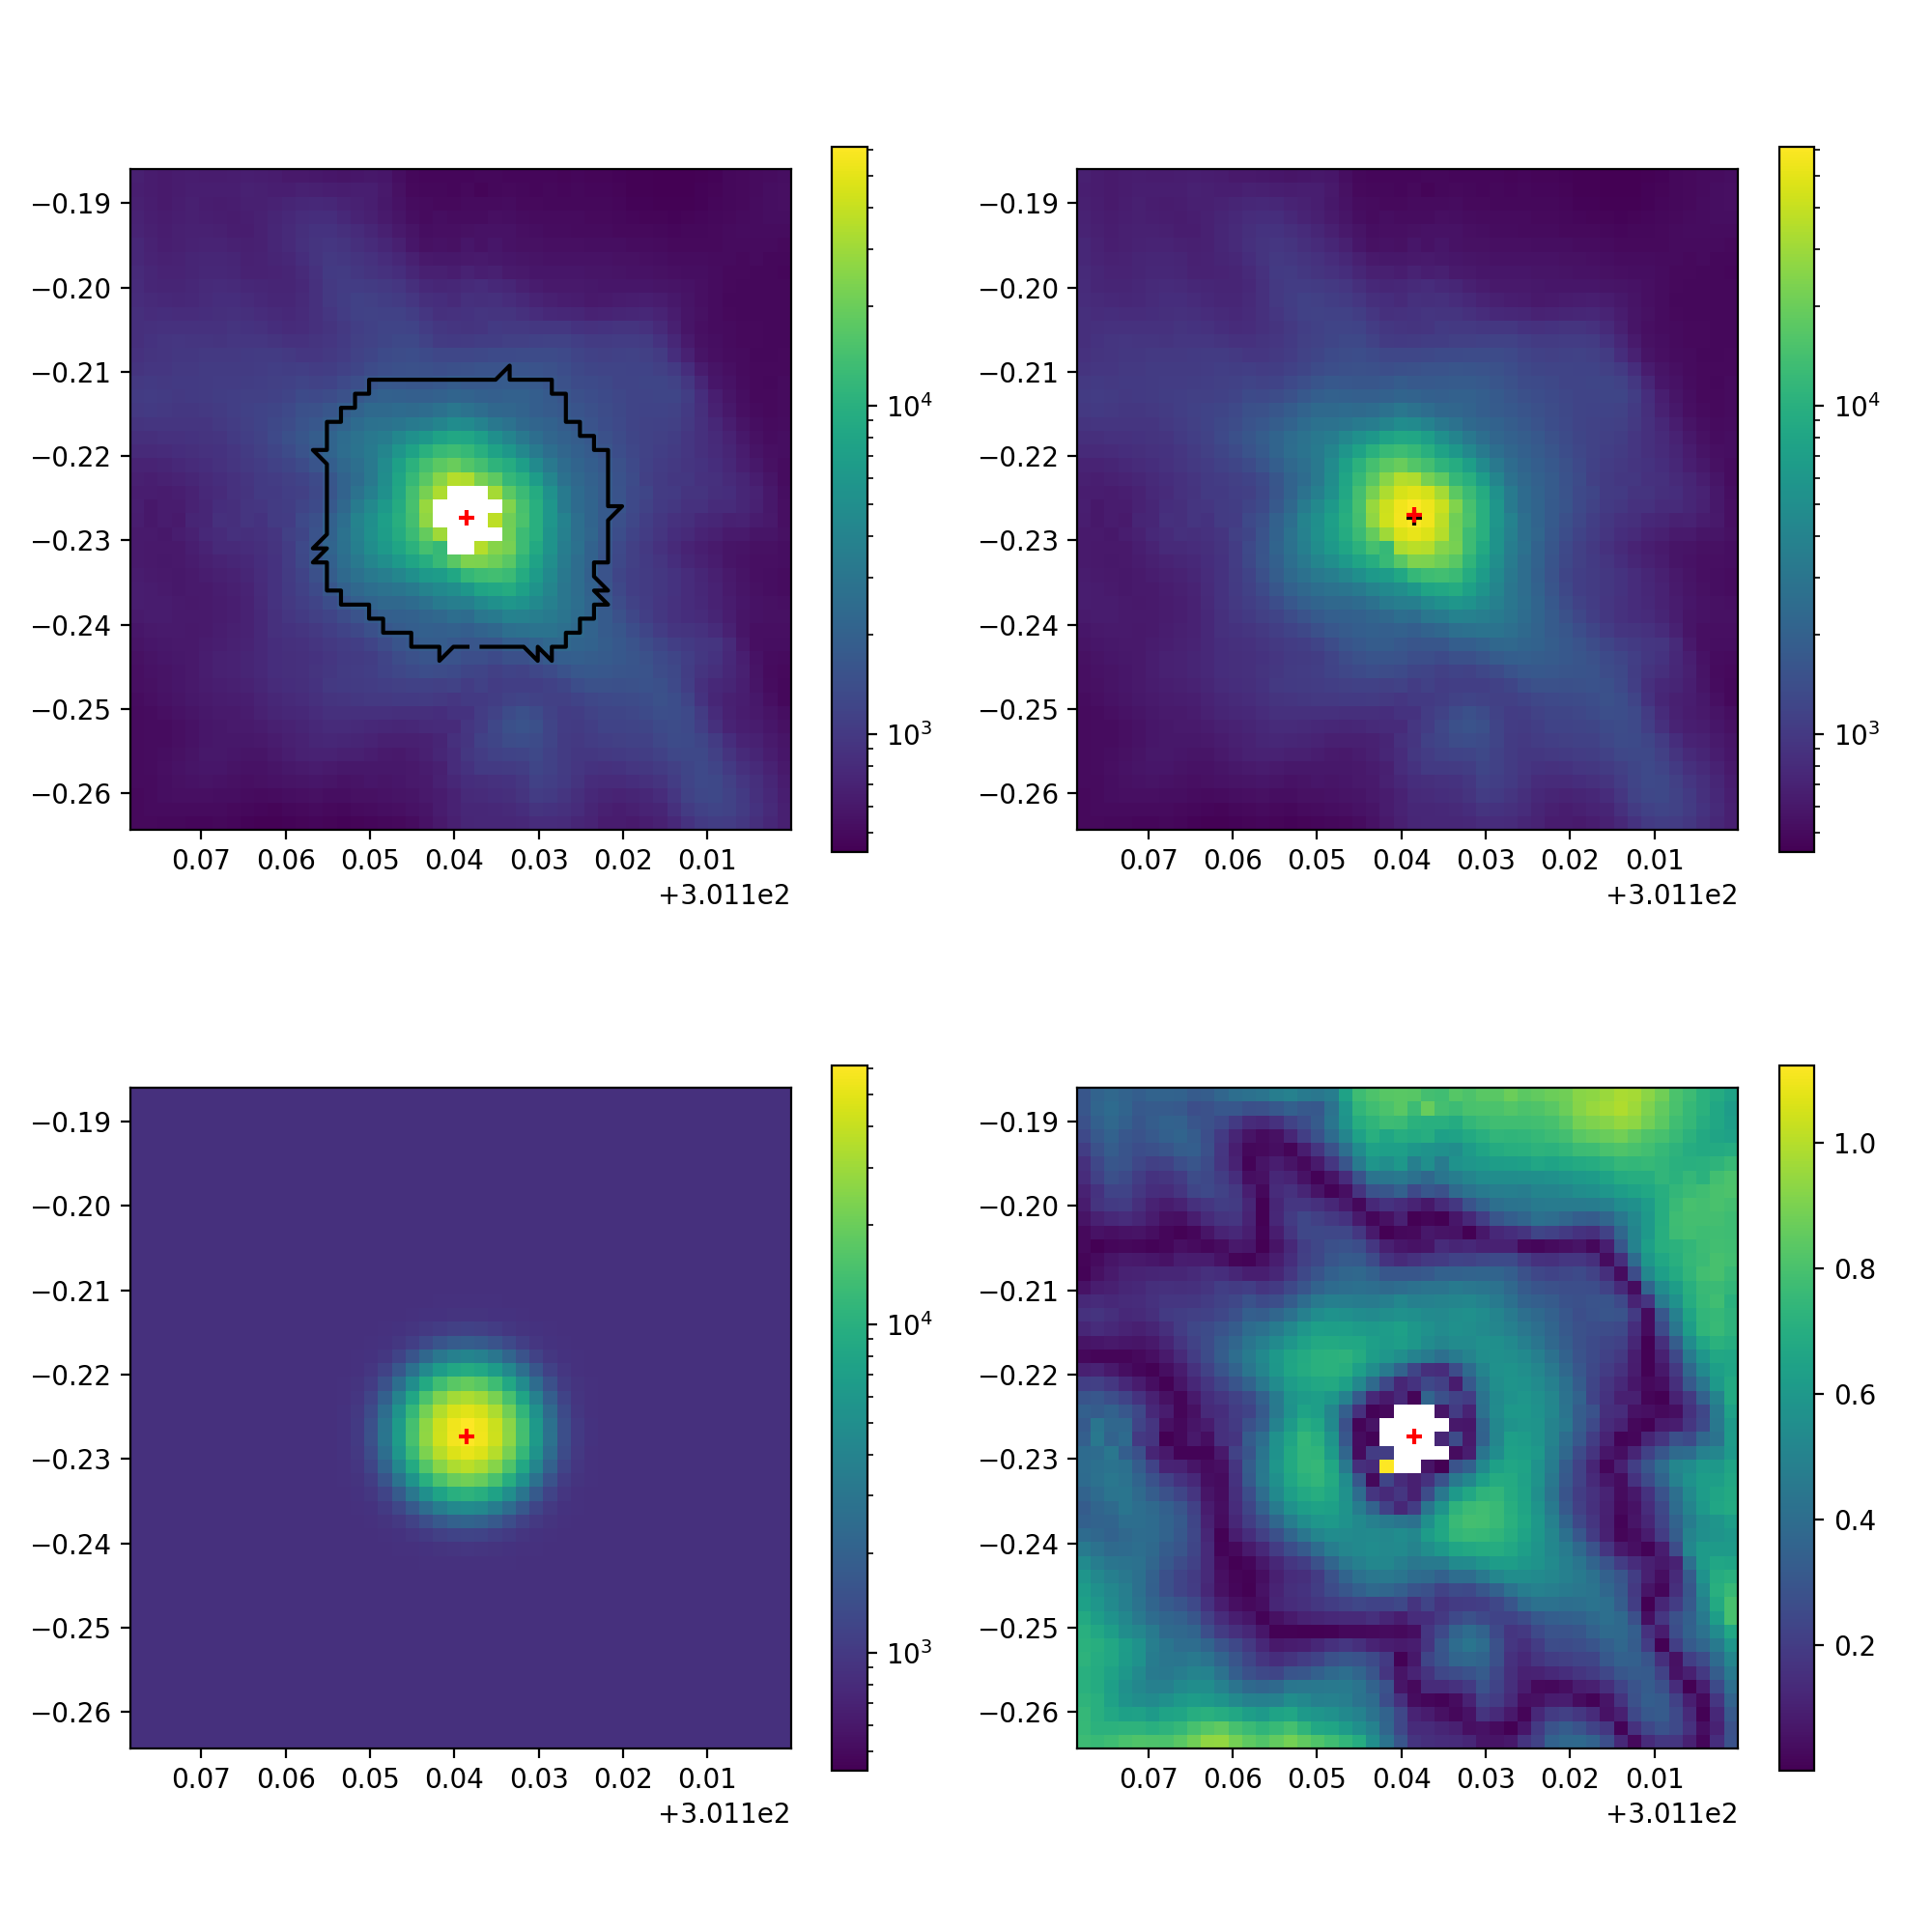

[ 3.01138502e+02 -2.26931032e-01  6.15557936e+04  2.90533218e+00
  9.02777778e-03  9.02777778e-03]


In [4]:
#supplying FWHM values to the fitter (in arcsec)
#Note how FWHM_vals has 2 sets of brackets [[]], even for 1 peak.

FWHM_vals = np.array([[32.,32.]])

image,params,bg = fitter(data,grid,FWHM=FWHM_vals)

results_plot(data,grid,image,params,bg)

print(params)

We may supply multiple pairs of values, trying with 3 pairs the code will recognize we are trying to fit 3 gaussians. It is important to verify that all inputted arrays correspond to the same number of sources, we cannot supply 3 pairs of FWHM values and 2 pairs of position values.

<IPython.core.display.Javascript object>


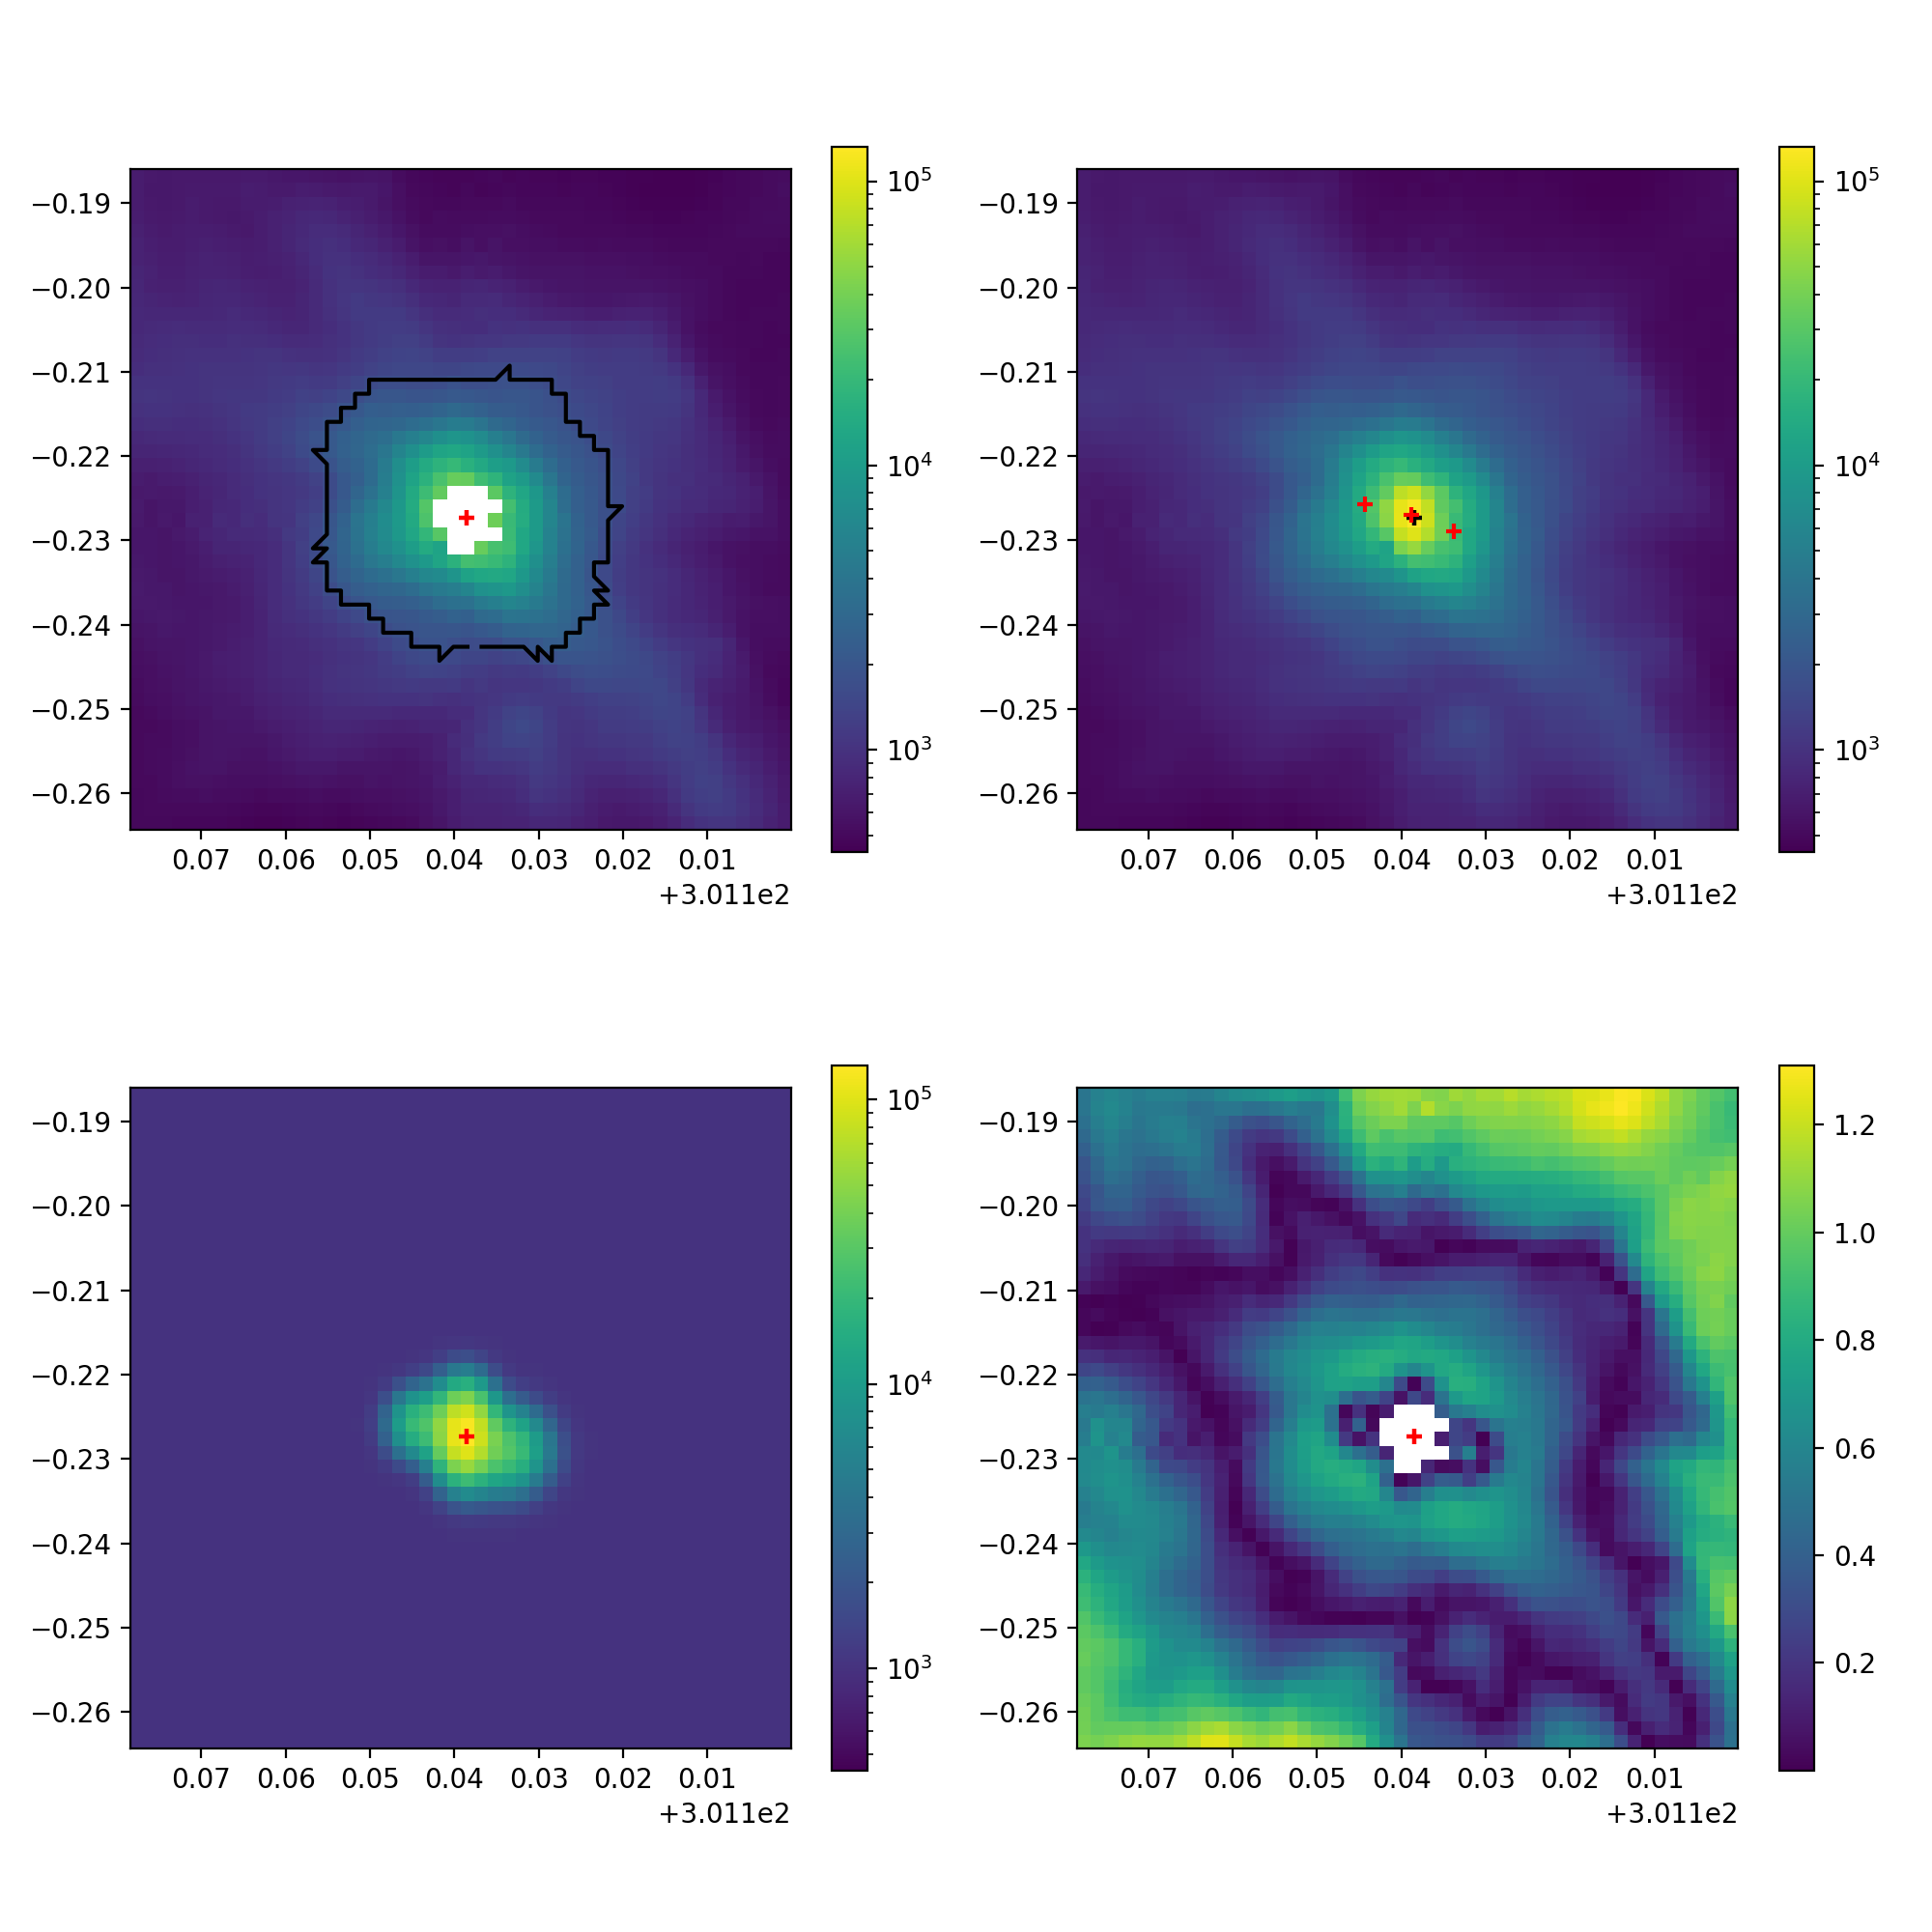

In [5]:
#Doing the same with 3 peaks by supplying 3 pairs of FWHM values (in arcsec)

FWHM_vals = np.array([[18.,16.],
                 [16.,24.],
                 [22.,22.]])

image,params,bg = fitter(data,grid,FWHM=FWHM_vals)

results_plot(data,grid,image,params,bg)

By default, the FWHM units should be provided in arcsec, but can also be in degrees, in which case the argument $\tt{units_{---}FWHM = ""}$ must be specified. Anything can be provided in the "", as long as it's different from "arcsec".

The same applies for the argument $\tt{theta}$, by default in degrees.

<IPython.core.display.Javascript object>


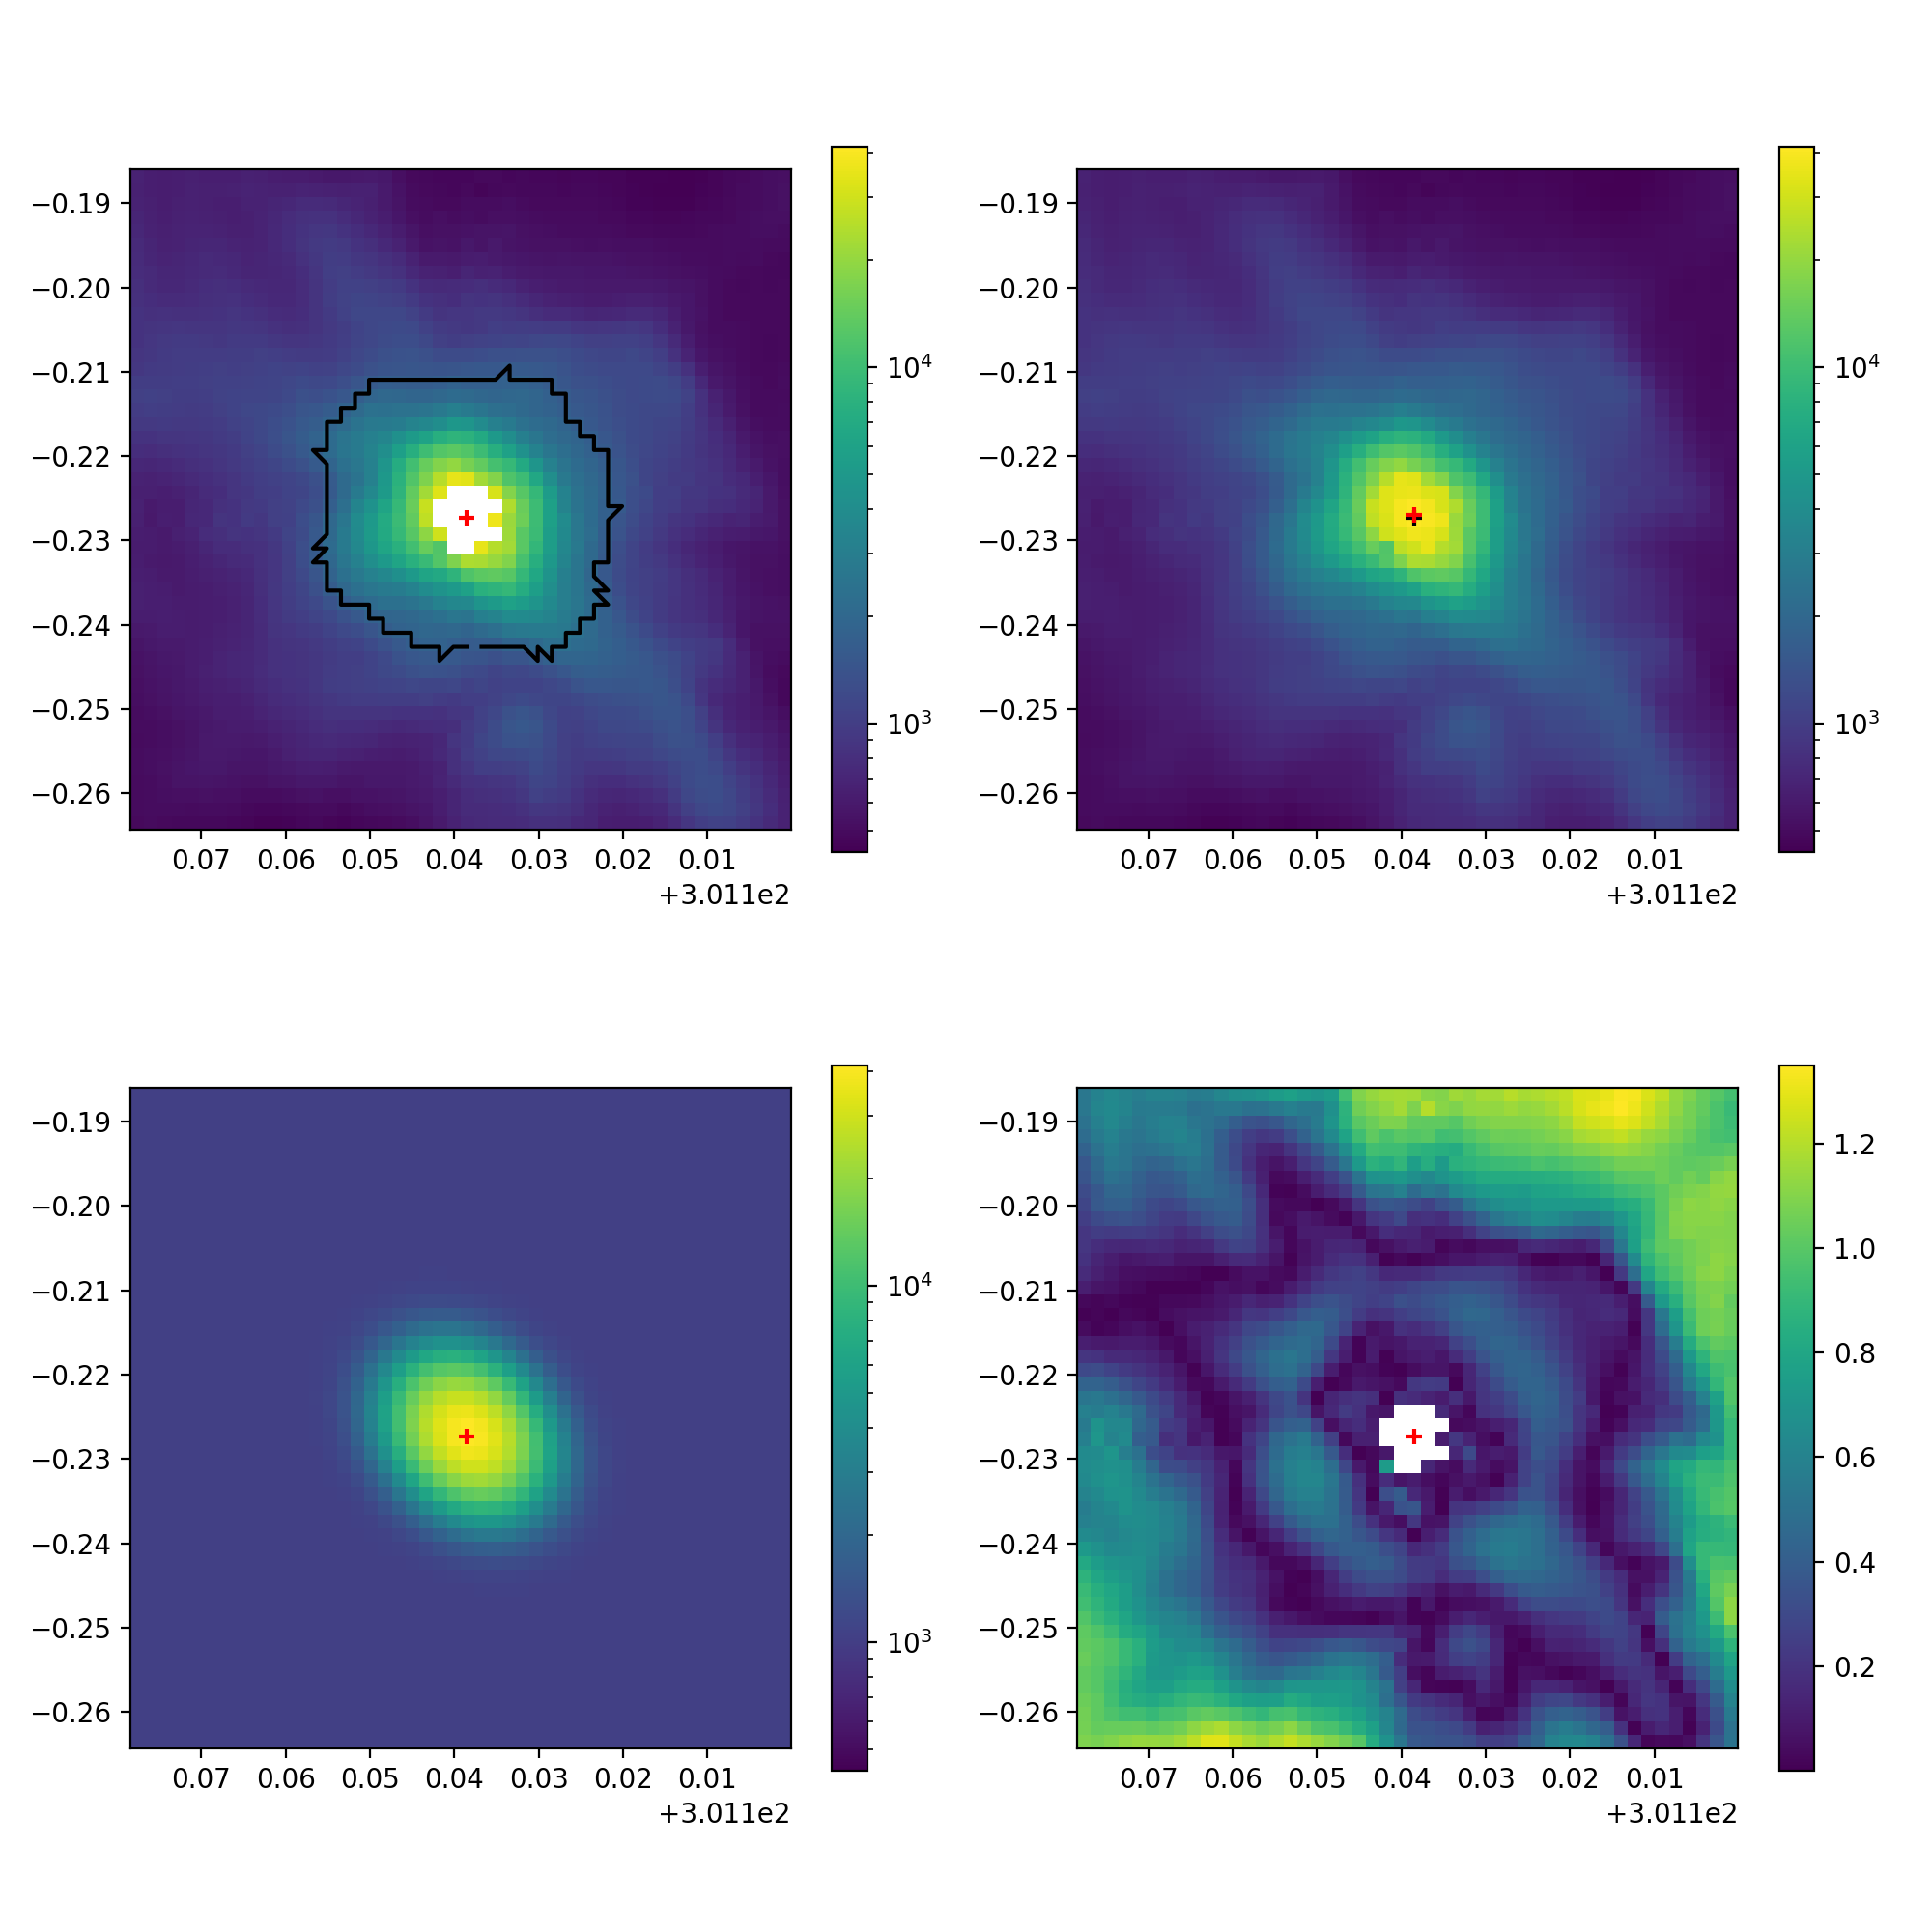

In [6]:
#supplying FWHM values to the fitter (in degrees)

FWHM_vals = np.array([[8e-3,8e-3]])

image,params,bg = fitter(data,grid,FWHM=FWHM_vals,units_FWHM="anything not arcsec")

results_plot(data,grid,image,params,bg)

We can do the same for the peaks' positions and angles between the semi-major axes and the $x$-axis. For the positions, we need an array of the same shape as FWHM, since there are 2 coordinates. For the angles we should use a 1D array with $n$ elements.

<IPython.core.display.Javascript object>


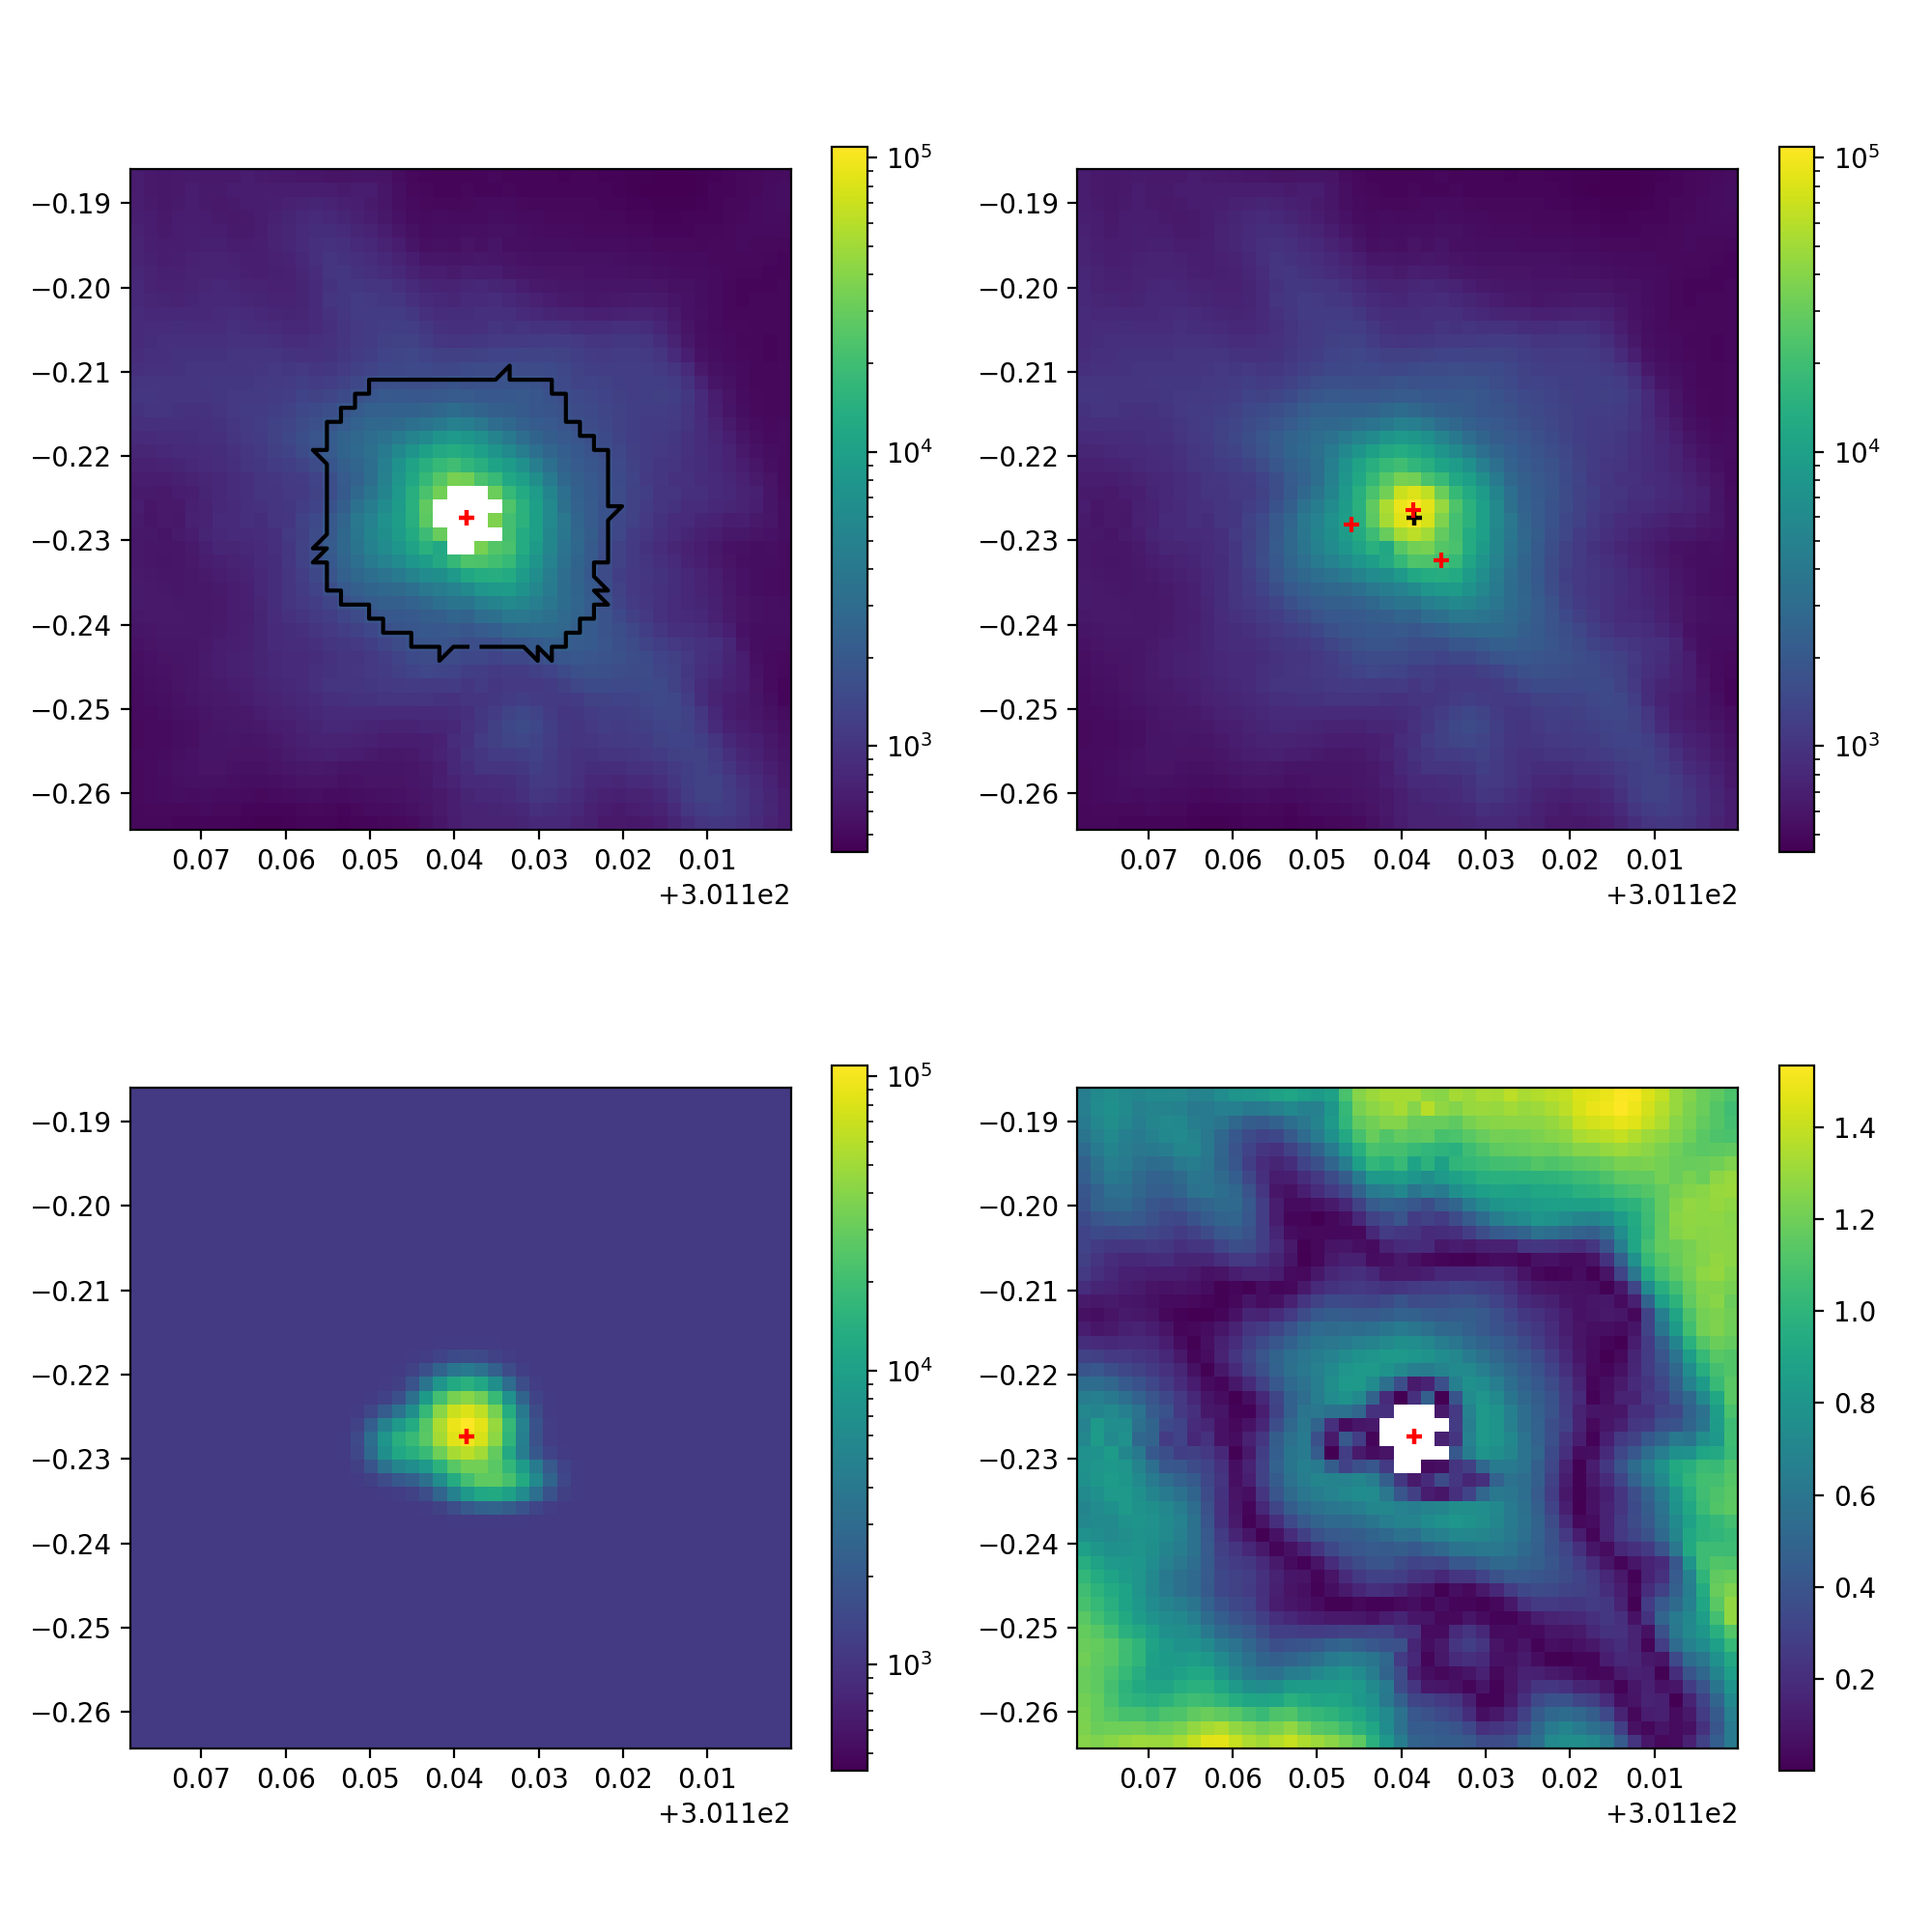

In [7]:
FWHM_vals = np.array([[18.,16.],
                 [12.,24.],
                 [22.,22.]])

mu_vals = np.array([[301.14,-0.227],
                    [301.14,-0.23],
                    [301.138,-0.225]])

theta_vals = np.array([0.,90.,0.])


image,params,bg = fitter(data,grid,mu = mu_vals,
                      theta = theta_vals,FWHM=FWHM_vals)

results_plot(data,grid,image,params,bg)

From the previous examples we can notice the initial parameters we give aren't exactly the ones that come out. This happens because the function changes them in order to find the best fit for the data. If the given parameters are certain, or have a known uncertainty this information can be inputted into the function, via the arguments $\tt{var_{---}pos,var_{---}theta,var_{---}FWHM}$ that take a float. These values are, if not stated otherwise, $0.01$ (in arcsec), $0.5$ (in degrees) and $0.5$ (in arcsec).

<IPython.core.display.Javascript object>


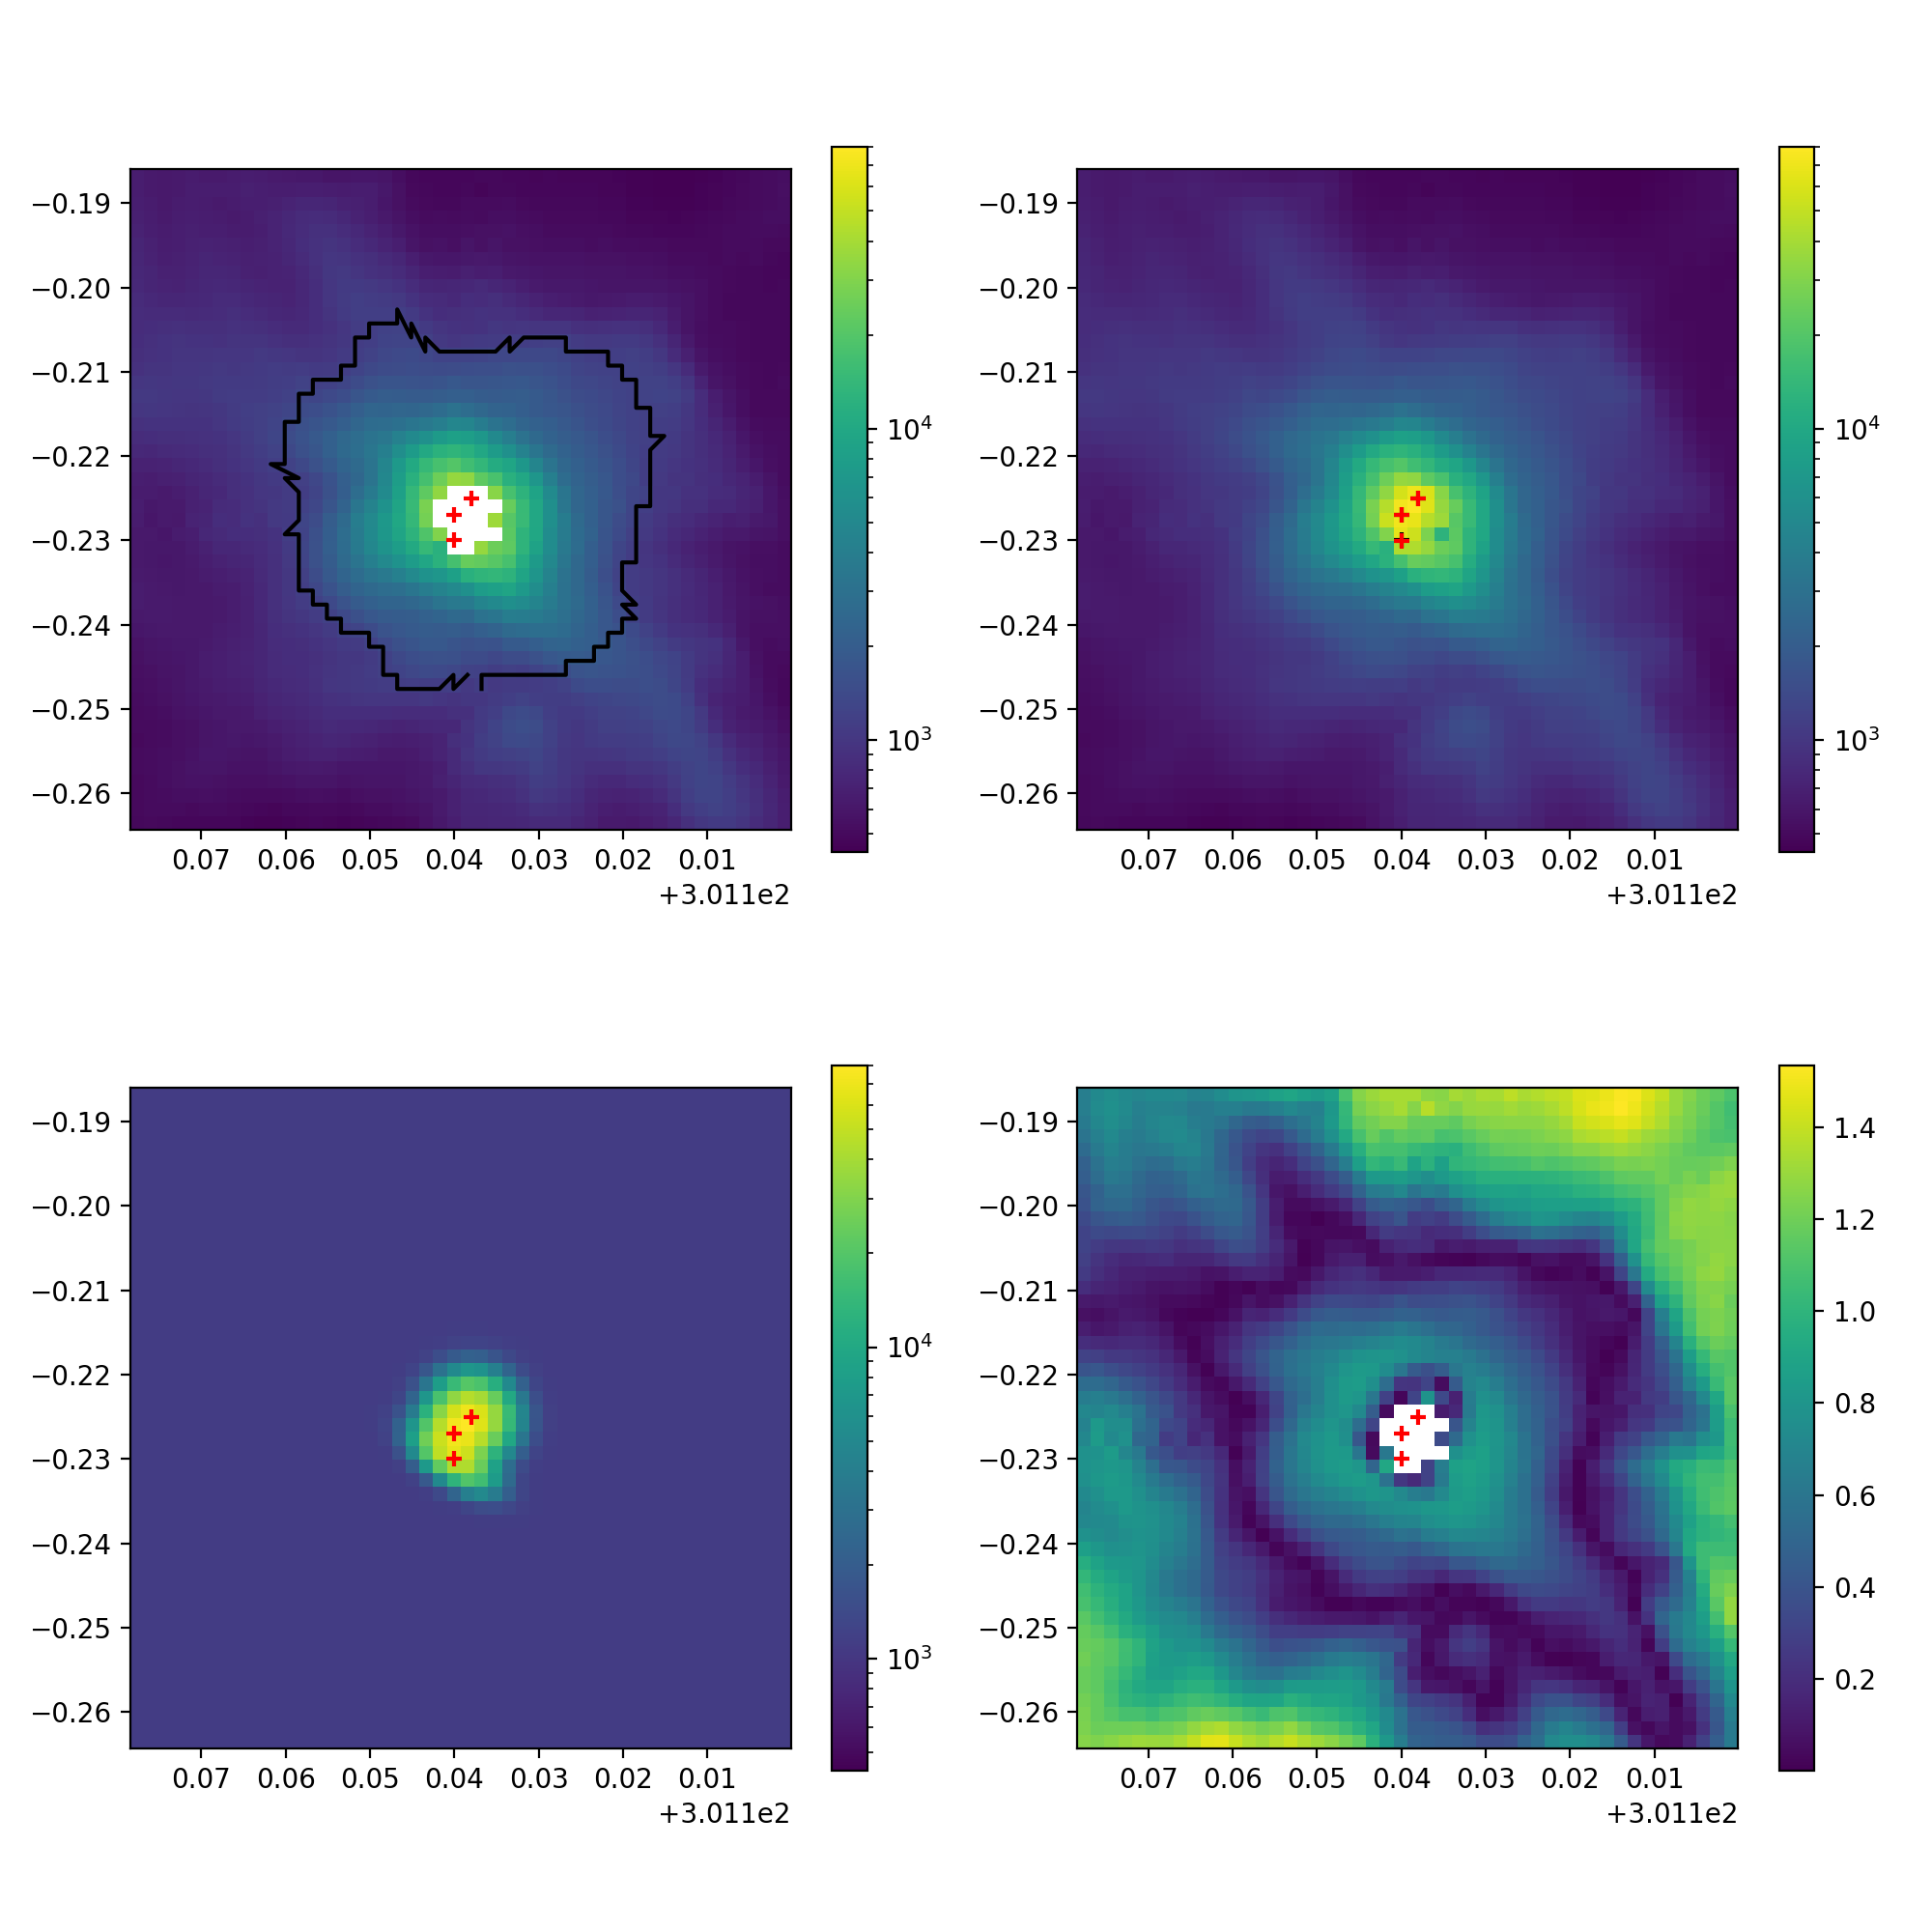

In [8]:
#Input the position, angle and FWHM
#restricting the FWHM and position, giving theta a 90 degree interval to vary

FWHM_vals = np.array([[18.,16.],
                 [12.,24.],
                 [22.,22.]])

mu_vals = np.array([[0.04+3.011e2,-0.227],
                    [0.04+3.011e2,-0.23],
                    [0.038+3.011e2,-0.225]])

theta_vals = np.array([0.,90.,0.])

image,params,bg = fitter(data,grid,mu = mu_vals,
                      theta = theta_vals,FWHM = FWHM_vals,
                     var_pos = 0.00001, var_theta = 90, var_FWHM = 0.00001)

results_plot(data,grid,image,params,bg,mu = mu_vals,FWHM = FWHM_vals)

## Fitting Background Flux

The function defines the area outside which data won't be considered for the fit as 4 times the FWHM from all the sources. this radius can be defined using the argument $\tt{fitting_{---}radius}$. Setting it to a large value will be equivalent to considering the entire image. 

The background value is a constant calculated using the points inside the fitting radius. It can be defined as the maximum of the flux histogram or as the mode. The method used to calculate the background is inputted using the argument $\tt{bg_{---}method}$ and can be either "mode" or "hist", by default set as the latter. This value is subtracted from the data when fitting and added back once the fit is done.  

<IPython.core.display.Javascript object>


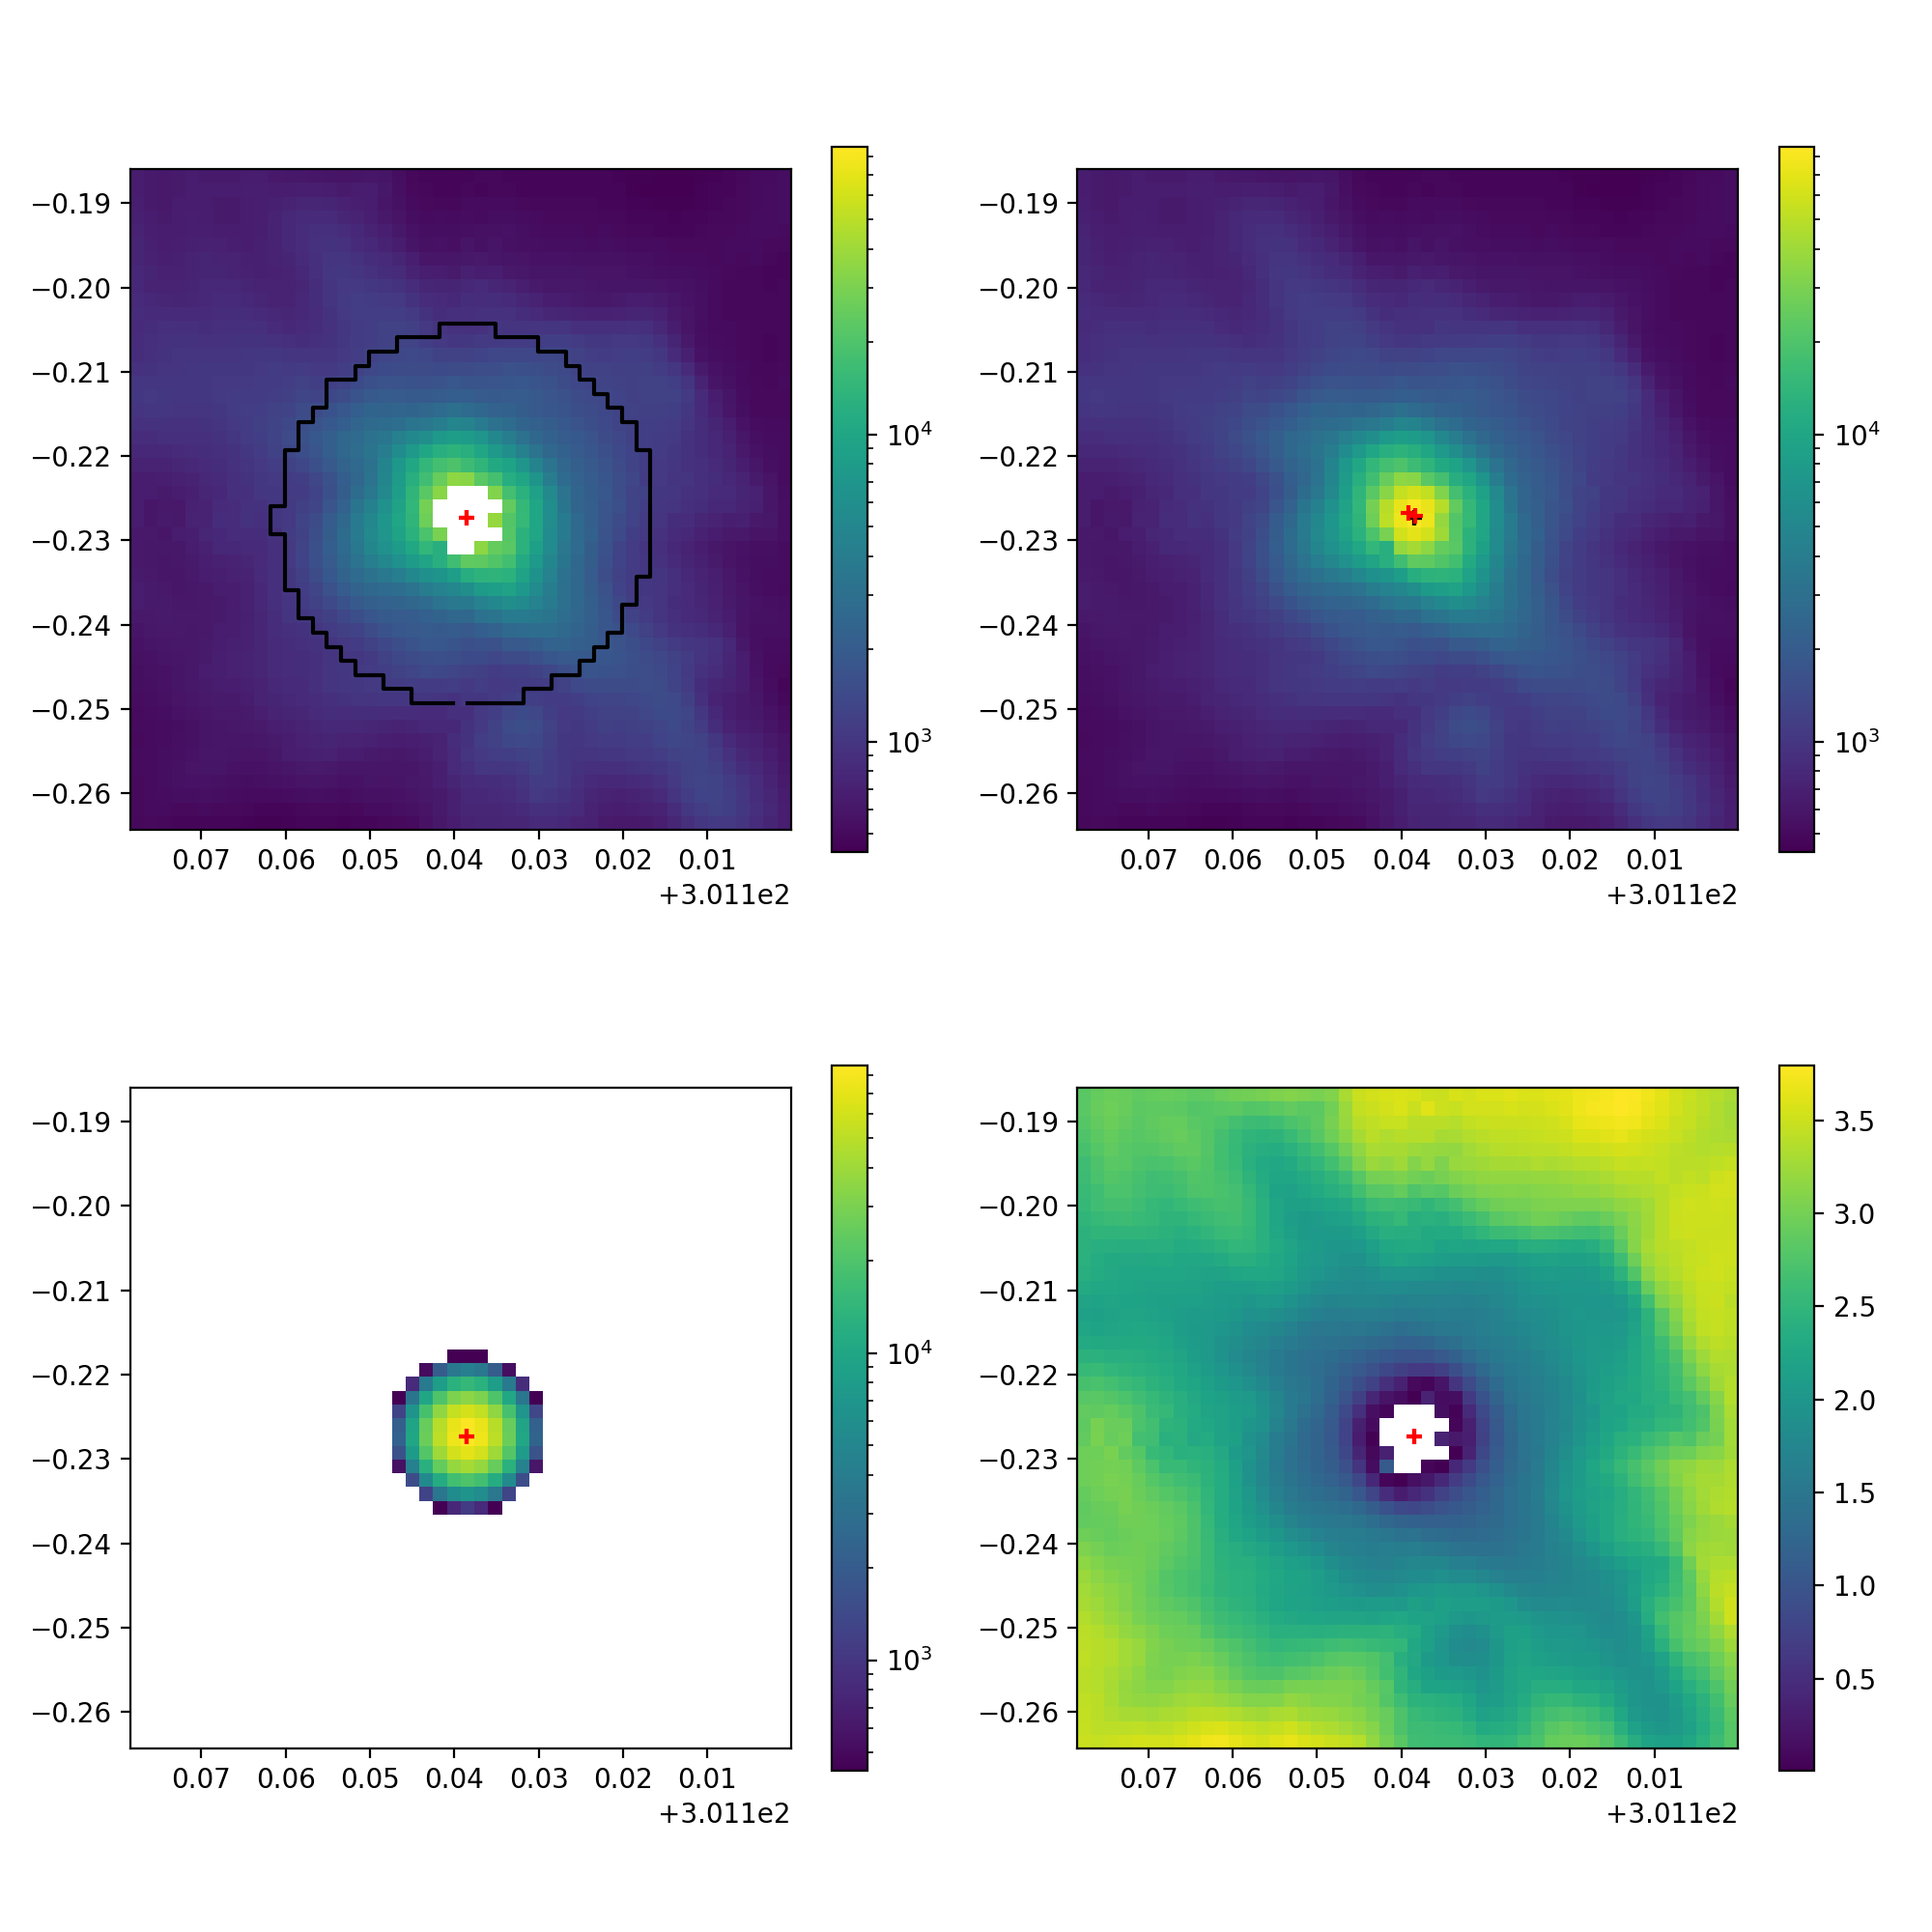

Estimated background value within fitting radius: 
-1223.2744140625


In [13]:
#Fitting 2 peaks and background

FWHM_vals = np.array([[28.,28.],
                     [22,22]])

image,params,bg = fitter(data,grid,
                      FWHM=FWHM_vals, fitting_radius = 3, bg_method = "mode", var_FWHM = 0.00001)

results_plot(data,grid,image,params,bg,FWHM = FWHM_vals,fitting_radius = 3, bg_method = "mode")

print("Estimated background value within fitting radius: \n{i1}".format(i1 = bg))

<IPython.core.display.Javascript object>


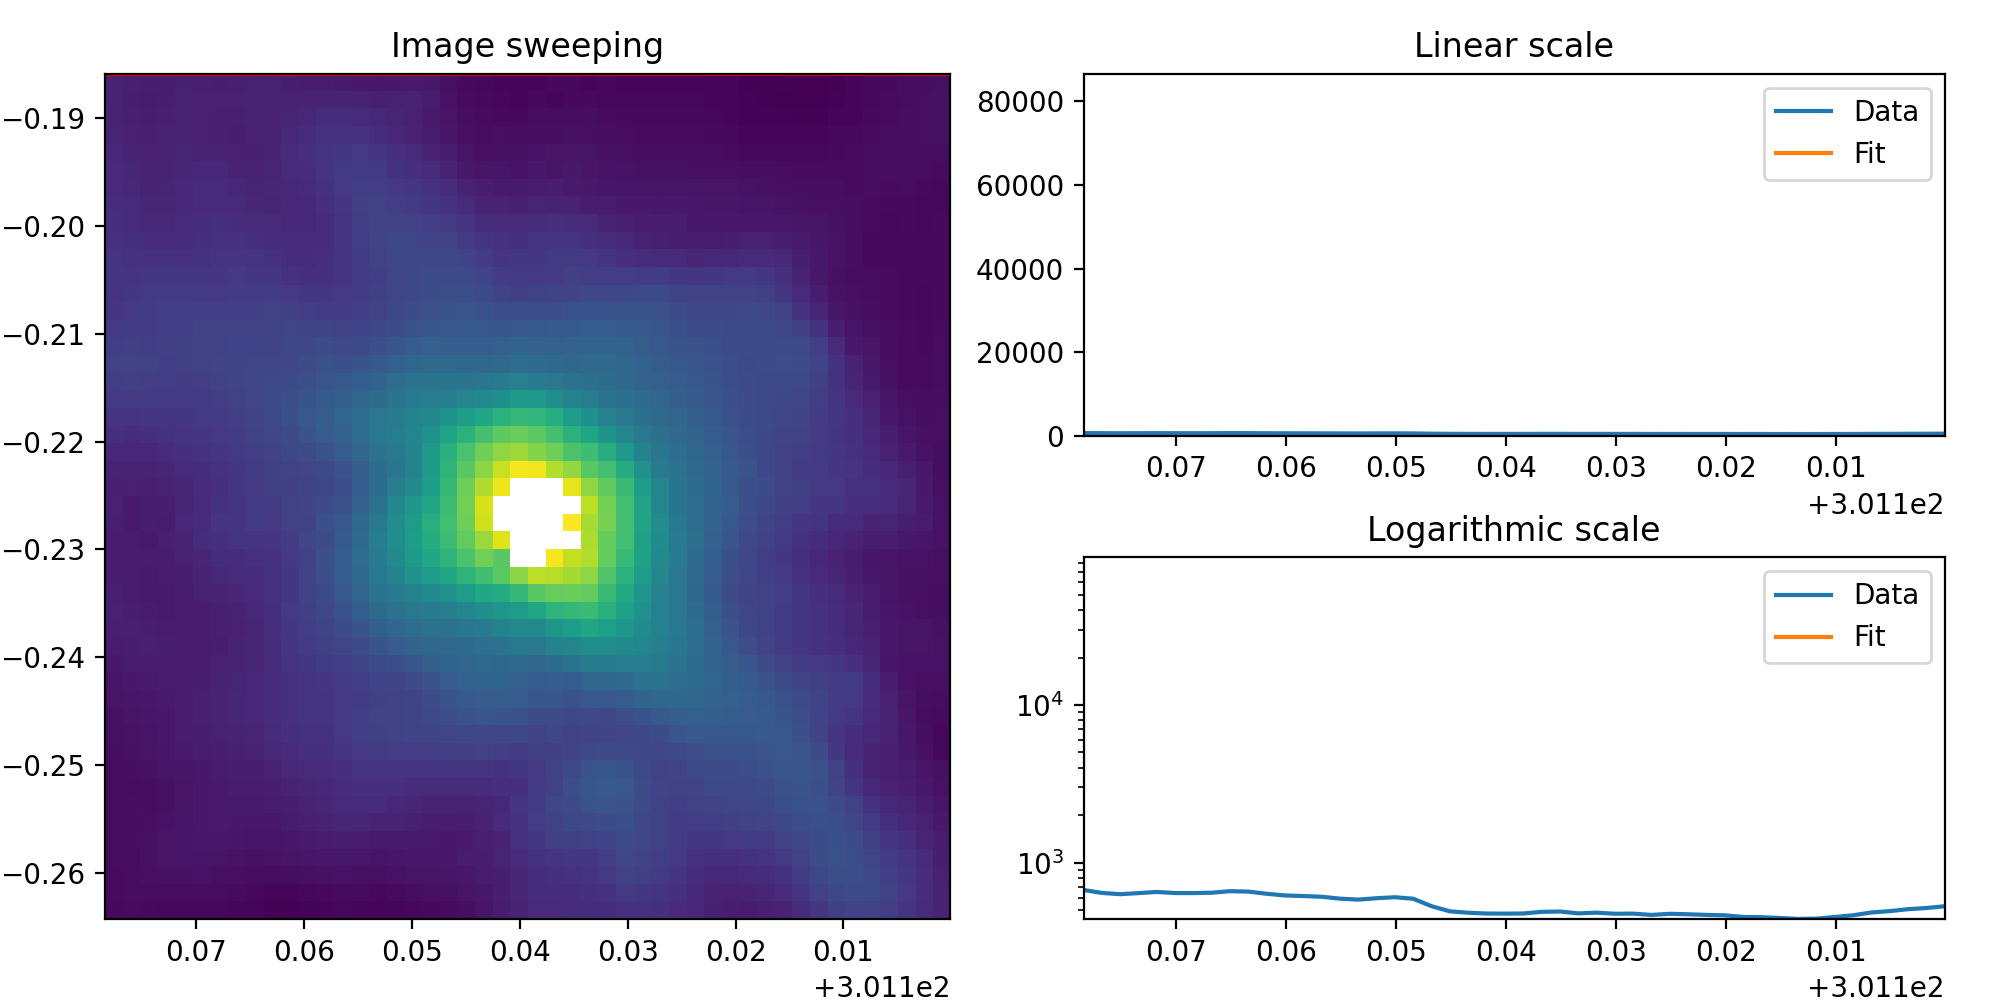

In [15]:
sweep_fit(grid,data,params,bg)

## General Sheet

### Functions:

$\tt{open_{---}fits_{---}image(file, lims, show = False)}$

- $\tt{file}$ $\;\;$-$\;\;$ name of the file as a $\tt{str}$;
- $\tt{limits} = [left,right,bottom,upper]$ $\;\;$-$\;\;$ list or array with borders of the desired sub-image;
- $\tt{show}$ $\;\;$-$\;\;$ boolean specifying if the function should plot the image.  

Returns the data and grid of the cropped (if applicable) image.

$-----------------------$

$\tt{fitter(data,grid,peaks=1,mu=[\;],theta=[\;],FWHM=[\;],}$\
$\;\;\;\;\;\;\;\;\;\;\;\tt{units_{---}theta="deg",units_{---}FWHM="arcsec",}$\
$\;\;\;\;\;\;\;\;\;\;\;\tt{var_{---}pos=0.01,var_{---}theta=0.5,var_{---}FWHM=0.5,}$\
$\;\;\;\;\;\;\;\;\;\;\;\tt{fitting_{---}radius=4,bg_{---}method="hist")}$

- $\tt{data}$ $\;\;$-$\;\;$ 2D matrix extracted from .fits file;
- $\tt{grid}$ $\;\;$-$\;\;$ arrays containing values of longitude and latitude;
- $\tt{peaks}$ $\;\;$-$\;\;$ int specifying number of peaks to fit in the saturated area (only if no initial information is provided about the sources);
- $\tt{mu}$ (optional) $\;\;$-$\;\;$ array containing pairs of values specifying the position of the peaks;
- $\tt{theta}$ (optional) $\;\;$-$\;\;$ array containing the angle between the semi major axis and the longitude;
- $\tt{FWHM}$ (optional) $\;\;$-$\;\;$ arrays containing pairs of values specifying the FWHM on the x and y axis;
- $\tt{units_{---}theta}$ (optional) $\;\;$-$\;\;$ string object to change input of theta from degrees to arcsec;
- $\tt{units_{---}FWHM}$ (optional) $\;\;$-$\;\;$ string object to change input of FWHM from arcsec to degrees;
- $\tt{var_{---}pos}$ (optional) $\;\;$-$\;\;$ float indicating the tolerance for position variation, only use if $\tt{mu}$ is specified;
- $\tt{var_{---}theta}$ (optional) $\;\;$-$\;\;$ float indicating the variation interval for angle, only use if $\tt{theta}$ is specified;
- $\tt{var_{---}FWHM}$ (optional) $\;\;$-$\;\;$ float indicating the variation interval for FWHM, only use if $\tt{FWHM}$ is specified;
- $\tt{fitting_{---}radius}$ $\;\;$-$\;\;$ radius outside which data will be discarded for analysis;
- $\tt{bg_{---}method}$ $\;\;$-$\;\;$ string element specifying which method is to be used to calculate the background flux value, can be "hist" or "mode".

Returns corrected data image, parameters of the fitted gaussians and the estimated background value.

$-----------------------$

$\tt{results_{---}plot(data,grid,image,params,bg,mu=[],FWHM=[],fitting_{---}radius=4,bg_{---}method="hist")}$
- $\tt{data}$ $\;\;$-$\;\;$ 2D matrix extracted from .fits file;
- $\tt{grid}$ $\;\;$-$\;\;$ arrays containing values of longitude and latitude;
- $\tt{image}$ $\;\;$-$\;\;$ 2D matrix containing the corrected image returned by the fitter function;
- $\tt{params}$ $\;\;$-$\;\;$ 1D array containing parameters of fitted gaussians returned by the fitter function;
- $\tt{bg}$ $\;\;$-$\;\;$ background flux value returned by the fitter function;
- $\tt{mu}$ (optional) $\;\;$-$\;\;$ array containing pairs of values specifying the position of the peaks;
- $\tt{FWHM}$ (optional) $\;\;$-$\;\;$ arrays containing pairs of values specifying the FWHM on the x and y axis;
- $\tt{fitting_{---}radius}$ $\;\;$-$\;\;$ radius outside which data will be discarded for analysis;
- $\tt{bg_{---}method}$ $\;\;$-$\;\;$ string element specifying which method is to be used to calculate the background flux value, can be "hist" or "mode".

Plots 4 graphs representing the results of the fit.

$-----------------------$

$\tt{sweep_{---}fit(grid,data,params,bg)}$
- $\tt{data}$ $\;\;$-$\;\;$ 2D matrix extracted from .fits file;
- $\tt{grid}$ $\;\;$-$\;\;$ arrays containing values of longitude and latitude;
- $\tt{params}$ $\;\;$-$\;\;$ 1D array containing parameters of fitted gaussians returned by the fitter function;
- $\tt{bg}$ $\;\;$-$\;\;$ background flux value returned by the fitter function;

Plots animated graphs showing the original data and fitted flux for each row.

$-----------------------$

$\tt{automation(table,files,path="",save_{---}path="",wavelength="",show=False,**kwargs)}$

- $\tt{table}$ $\;\;$-$\;\;$ name of table containing sources info;
- $\tt{files}$ $\;\;$-$\;\;$ names of file as a list;
- $\tt{path}$ $\;\;$-$\;\;$ path where the table and files are found;
- $\tt{save_{---}path}$ $\;\;$-$\;\;$ path where corrected files are to be saved, with the same name and "_fix.fits" in the end;
- $\tt{wavelength}$ $\;\;$-$\;\;$ string element specifying the wavelength of files in case input table contains FWHM values of multiple wavelengths;
- $\tt{show}$ $\;\;$-$\;\;$ boolean specifying if the function should plot the fixed image and residuals plots for every file;
- $\tt{**kargs}$ $\;\;$-$\;\;$ any other variables to be provided to the fitter function, such as variation intervals or units
 
Returns list containing names of the saved fixed files.